<h1> Logistic Regression <h1>
<blockquote> Lastly, we shall see if Twitter sentiment is enough data in order to predict days with high stock volatility. This will be done by separating trading days into days with top 50% return rates and days with the bottom 50% return rates.

<h3>Now we shall create a logistic regression model using a 80/20 ratio between the training sample and the testing sample which have been selected randomly from the full dataset<h3>
<blockquote> The independent variable x will be the Twitter sentiment varible adjusted by popularity and the dependent variable y will be the rate of return of the analysed stock quote. </blockquote><br> 
The model will be applied to the data by the Log_reg function, which takes as input data the independent variable dataset (x) and the dependent variable dataset (y).

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
def Log_reg(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    #print(X_train.info)
    print(X_train.size)
    model = LogisticRegression(solver='liblinear',C=10, random_state=1, class_weight='balanced', max_iter = 200).fit(X_train,y_train)
    log_reg = sm.Logit(y_train, X_train).fit()
    print(log_reg.summary())
    print("Classes:",model.classes_)
    print("Model accuracy",model.score(X_test, y_test))
    cm = confusion_matrix(y_test, model.predict(X_test))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.title('Confusion Matrix')        
    plt.show()
    print(classification_report(y_test, model.predict(X_test)))
    '''scores = cross_val_score(model, X_train, y_train, cv=10)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    print("Average Accuracy: ",scores.mean())'''

<h3> Firstly, the data pertaining to the Nasdaq rate of return shall be analysed. We shall use the absolute returns in order to check if days with high volatility can be predicted using sentiment analysis. <br>The rate of return is compared to the median rate, days with a lower value are classified as low-volatility days (category 0) and days with high volatility are those with rates exceeding the median (category 1)

In [22]:
import pandas as pd
import numpy as np

path = "Twitter_Sentiment_Analysis/Data/Dataset.xlsx"
df = pd.read_excel (path, sheet_name='Nasdaq_LR')
df = df.dropna()
x = np.array(df['S/PABS']).reshape(-1,1)
y = np.array(df['ret_top_50_5_abs'])


229
Optimization terminated successfully.
         Current function value: 0.689240
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  229
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                0.005623
Time:                        14:55:41   Log-Likelihood:                -157.84
converged:                       True   LL-Null:                       -158.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0191      0.014      1.328      0.184      -0.009       0.047
Classes: [0 1]
Model accu

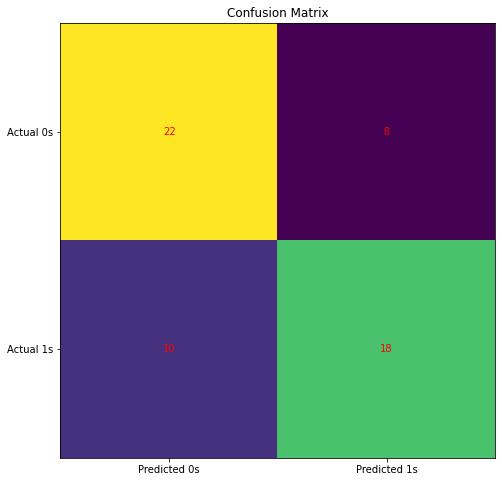

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        30
           1       0.69      0.64      0.67        28

    accuracy                           0.69        58
   macro avg       0.69      0.69      0.69        58
weighted avg       0.69      0.69      0.69        58



In [23]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The model x1 variable (parameter coresponding to the independent variable) is not statistically significant for a 95% or higher confidence level according to the Z test <blockquote> This means that the model is practically unusable and that a sentiment-based model isn't a good fit for predicting Nasdaq's volatility</blockquote></li>
<li>The model seems to have a higher f1-score for low volatility days compared to the high volatility ones, this means that the model is better suited to predicting days where there aren't big changes in return</li>
<li> The model's general accuracy is 0.69, which means that on average the model manages to predict corectly 69% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>

<h3>NVDA<h3>
In this case, the independent variable will be the Twitter sentiment adjusted by popularity and the dependent variable will be the days in relation to the median of the rate of return (for 4 days). 
<blockquote> Days which have a 4 day rate of return lower than the median will be classified as low profitability days (category 0) and days with a rate of return higher than the median will be high profitability days (category 1) </blockquote>

In [24]:
df = pd.read_excel (path, sheet_name='NVDA_LR')
df = df.dropna()

x = np.array(df['S/P']).reshape(-1,1)
y = np.array(df['ret_top_50_4'])

205
Optimization terminated successfully.
         Current function value: 0.654701
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  205
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                 0.05415
Time:                        14:55:41   Log-Likelihood:                -134.21
converged:                       True   LL-Null:                       -141.90
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0249      0.007      3.648      0.000       0.012       0.038
Classes: [0 1]
Model accu

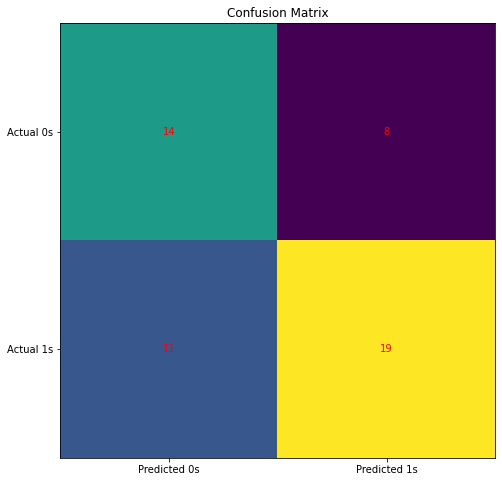

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        22
           1       0.70      0.63      0.67        30

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.64      0.63      0.64        52



In [25]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The model x1 variable (parameter coresponding to the independent variable) is statistically significant for a 95% or higher confidence level according to the Z test <blockquote> This means that the model is usable and that a sentiment-based model can be a good fit for predicting Nvidia's profitability</blockquote></li>
<li>The model seems to have a higher f1-score for high profitability days compared to the low profitability ones, this means that the model is better suited to predicting days where higher rates of return happen</li>
<li> The model's general accuracy is 0.63, which means that on average the model manages to predict corectly 63% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>

<h3>AMD</h3>
In this case, the independent variable will be the Twitter sentiment adjusted by popularity and the dependent variable will be the days in relation to the median of the rate of return (for 10 days). 
<blockquote> Days which have a 10 day rate of return lower than the median will be classified as low profitability days (category 0) and days with a rate of return higher than the median will be high profitability days (category 1) </blockquote>

In [26]:
df = pd.read_excel (path, sheet_name='AMD_LR')
df = df.dropna()
x = np.array(df['S/P']).reshape(-1,1)
y = np.array(df['ret_top_50_10'])

184
Optimization terminated successfully.
         Current function value: 0.616510
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  184
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.1105
Time:                        14:55:42   Log-Likelihood:                -113.44
converged:                       True   LL-Null:                       -127.53
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0211      0.005      4.449      0.000       0.012       0.030
Classes: [0. 1.]
Model ac

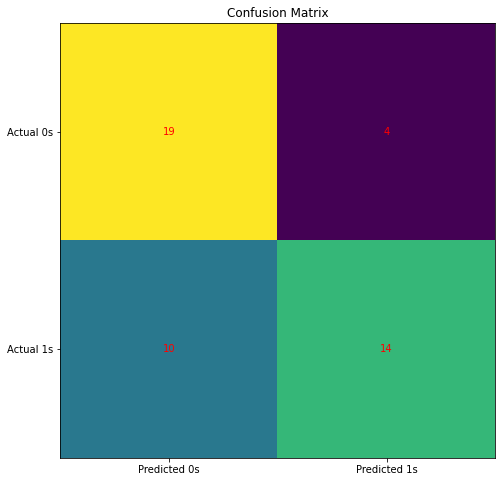

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73        23
         1.0       0.78      0.58      0.67        24

    accuracy                           0.70        47
   macro avg       0.72      0.70      0.70        47
weighted avg       0.72      0.70      0.70        47



In [27]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The model x1 variable (parameter coresponding to the independent variable) is statistically significant for a 95% or higher confidence level according to the Z test <blockquote> This means that the model is usable and that a sentiment-based model can be a good fit for predicting AMD's profitability</blockquote></li>
<li>The model seems to have a higher f1-score for low profitability days compared to the high profitability ones, this means that the model is better suited to predicting days where lower rates of return happen</li>
<li> The model's general accuracy is 0.70, which means that on average the model manages to predict corectly 70% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>

<h3> TESLA </h3>
In this case, the independent variable will be the Twitter sentiment adjusted by popularity and the dependent variable will be the days in relation to the median of the rate of return (for 5 days). 
<blockquote> Days which have a 5 day rate of return lower than the median will be classified as low profitability days (category 0) and days with a rate of return higher than the median will be high profitability days (category 1) </blockquote>

In [28]:
path = "Twitter_Sentiment_Analysis/Data/Dataset.xlsx"
df = pd.read_excel (path, sheet_name='TSLA_LR')
df = df.dropna()

x =np.array(df['S/P']).reshape(-1,1)

y = np.ravel(np.array(df['ret_top_50_5']).reshape(-1,1))

207
Optimization terminated successfully.
         Current function value: 0.599170
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  207
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            0
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                 0.09881
Time:                        14:55:42   Log-Likelihood:                -124.03
converged:                       True   LL-Null:                       -137.63
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020      0.000      5.196      0.000       0.001       0.003
Classes: [0. 1.]
Model ac

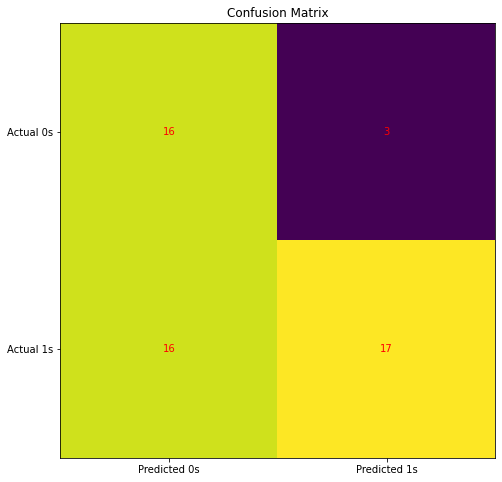

              precision    recall  f1-score   support

         0.0       0.50      0.84      0.63        19
         1.0       0.85      0.52      0.64        33

    accuracy                           0.63        52
   macro avg       0.68      0.68      0.63        52
weighted avg       0.72      0.63      0.64        52



In [29]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The model x1 variable (parameter coresponding to the independent variable) is statistically significant for a 95% or higher confidence level according to the Z test <blockquote> This means that the model is usable and that a sentiment-based model can be a good fit for predicting TSLA's profitability</blockquote></li>
<li>The model seems to have a slightly higher f1-score for high profitability days compared to the low profitability ones, this means that the model is about as well suited for predicting high profitability days as well as low profitability days</li>
<li> The model's general accuracy is 0.63, which means that on average the model manages to predict corectly 63% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>

<h3> Tesla predicted by Tesla-Nvidia sentiment </h3>
In this case, the independent variable will be the Twitter sentiment adjusted by popularity for Nvdia and Tesla, and the dependent variable will be the days in relation to the median of the rate of return (for 5 days) for Tesla. 
<blockquote> Days which have a 5 day rate of return lower than the median will be classified as low profitability days (category 0) and days with a rate of return higher than the median will be high profitability days (category 1) </blockquote> <br>
Tesla and Nvidia were chosen as Tesla is an important client of Nvidia, Nvidia manufacturing the chips needed for training and using Tesla's advanced assisted driving AI

In [30]:

path = "Twitter_Sentiment_Analysis/Data/Dataset.xlsx"
df = pd.read_excel (path, sheet_name='AMD-NVDA-TSLA_LR')
df=df[['S/PAMD','S/PNVDA','S/PTSLA','ret_top_50_5_TSLA']].dropna()

x = df[['S/PNVDA','S/PTSLA']]

y = np.array(df['ret_top_50_5_TSLA'])

376
Optimization terminated successfully.
         Current function value: 0.566816
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.1647
Time:                        14:55:42   Log-Likelihood:                -106.56
converged:                       True   LL-Null:                       -127.57
Covariance Type:            nonrobust   LLR p-value:                 9.001e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
S/PNVDA        0.0138      0.007      2.032      0.042       0.000       0.027
S/PTSLA        0.0024    

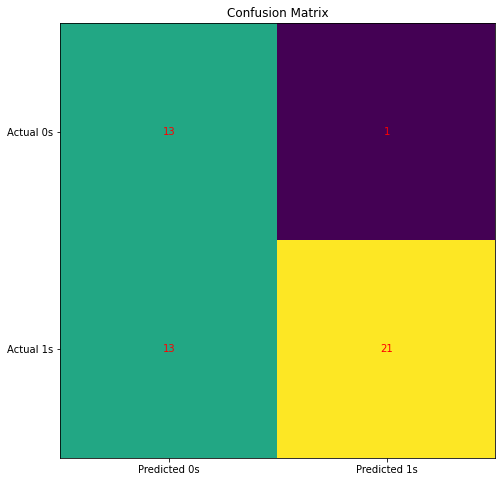

              precision    recall  f1-score   support

         0.0       0.50      0.93      0.65        14
         1.0       0.95      0.62      0.75        34

    accuracy                           0.71        48
   macro avg       0.73      0.77      0.70        48
weighted avg       0.82      0.71      0.72        48



In [31]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The model x variables (parameters coresponding to the independent variable) are statistically significant for a 95% or higher confidence level according to the Z test <blockquote> This means that the model is usable and that a sentiment-based model can be a good fit for predicting TSLA's profitability</blockquote></li>
<li>The model seems to have a  higher f1-score for high profitability days compared to the low profitability ones, this means that the model is better suited for predicting high profitability days</li>
<li> The model's general accuracy is 0.71, which means that on average the model manages to predict corectly 71% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>

<h3> Nvidia predicted by AMD, Tesla and Nvidia sentiment </h3>
In this case, the independent variable will be the Twitter sentiment adjusted by popularity for AMD, Nvdia and Tesla, and the dependent variable will be the days in relation to the median of the rate of return (for 5 days) for Nvidia. 
<blockquote> Days which have a 5 day rate of return lower than the median will be classified as low profitability days (category 0) and days with a rate of return higher than the median will be high profitability days (category 1) </blockquote> <br>
Tesla and AMD were chosen as Nvidia is the main competitor of AMD and that Tesla has a series of contracts with Nvidia

In [32]:

path = "Twitter_Sentiment_Analysis/Data/Dataset.xlsx"
df = pd.read_excel (path, sheet_name='AMD-NVDA_RL')
df=df[['S/PAMD','S/PNVDA','S/PTSLA','rand_top_50_4_NVDA']].dropna()

x = df[['S/PNVDA','S/PTSLA','S/PAMD']]

y = np.array(df['rand_top_50_4_NVDA'])

570
Optimization terminated successfully.
         Current function value: 0.641007
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  190
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                 0.07493
Time:                        14:55:43   Log-Likelihood:                -121.79
converged:                       True   LL-Null:                       -131.66
Covariance Type:            nonrobust   LLR p-value:                 5.198e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
S/PNVDA        0.0219      0.007      3.297      0.001       0.009       0.035
S/PTSLA        0.0005    

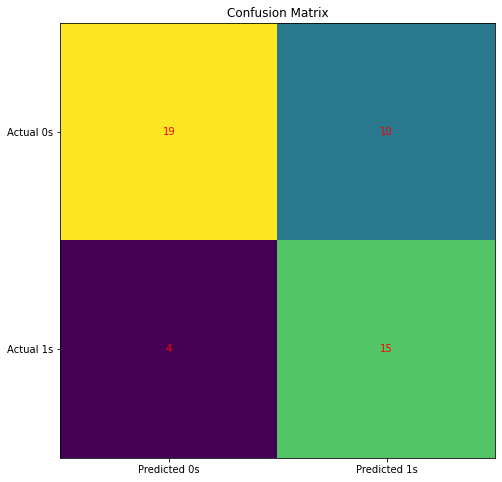

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.60      0.79      0.68        19

    accuracy                           0.71        48
   macro avg       0.71      0.72      0.71        48
weighted avg       0.74      0.71      0.71        48



In [33]:
Log_reg(x,y)

<h1> From the model's output, we can draw the following conclusions: </h1>
<ul>
<li>The only x variable which is statistically significant for a 95% or higher confidence level according to the Z test is the one associated to Nvidia's Twitter sentiment <blockquote> This means that the model is usable and that a sentiment-based model can be a good fit for predicting Nvidia's profitability, but that the other company's sentiments may be redundant</blockquote></li>
<li>The model seems to have a  higher f1-score for low profitability days compared to the high profitability ones, this means that the model is better suited for predicting low profitability days</li>
<li> The model's general accuracy is 0.71, which means that on average the model manages to predict corectly 71% of the days based on the data given, this is confirmed by looking at the confusion matrix </li> 
</ul>